<a href="https://colab.research.google.com/github/vsaliievaa/UnderstandingPFI/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

### Reading Excel files containing our data

In [ ]:
psc = pd.read_excel("/content/CombinedRevisedPolityScore.xlsx", sheet_name = "PolityScore", usecols="A:R", header=0, index_col=1)
psc.dropna(inplace=True)
psc.rename( columns={'Unnamed: 0':'country'}, inplace=True )
psc_pfi = pd.read_excel("/content/CombinedRevisedPolityScore.xlsx", sheet_name = "PressFreedomIndex", usecols="A:R", header=0, index_col=1)
psc_pfi.dropna(inplace=True)
psc_pfi.rename( columns={'Unnamed: 0':'country'}, inplace=True )

crp = pd.read_excel("/content/Corruption.xlsx", sheet_name = "Corruption", usecols="A:R", header=0, index_col=1)
crp.dropna(inplace=True)
crp.rename( columns={'Unnamed: 0':'country'}, inplace=True )
crp_pfi = pd.read_excel("/content/Corruption.xlsx", sheet_name = "PFI (for corruption)", usecols="A:R", header=0, index_col=1)
crp_pfi.dropna(inplace=True)
crp_pfi.rename( columns={'Unnamed: 0':'country'}, inplace=True )

educind = pd.read_excel("/content/EducationIndex-HDR-UNDP.xlsx", sheet_name = "Education index", usecols="A:R", header=0, index_col=1)
educind.dropna(inplace=True)
educind.rename( columns={'Unnamed: 0':'country'}, inplace=True )
educind['country'] = [i[1:] for i in educind['country'].tolist()] # run only once!!!

educind_pfi = pd.read_excel("/content/EducationIndex-HDR-UNDP.xlsx", sheet_name = "PFI (for education)", usecols="A:R", header=0, index_col=1)
educind_pfi.dropna(inplace=True)
educind_pfi.rename( columns={'Unnamed: 0':'country'}, inplace=True )

gdp = pd.read_excel("/content/GDPPerCapitaPPP-WorldBank.xlsx", sheet_name = "GDPPerCapitaPPP", usecols="A:R", header=0, index_col=1)
gdp.dropna(inplace=True)
gdp.rename( columns={'Unnamed: 0':'country'}, inplace=True )
gdp_pfi = pd.read_excel("/content/GDPPerCapitaPPP-WorldBank.xlsx", sheet_name = "PFI (for GDP)", usecols="A:R", header=0, index_col=1)
gdp_pfi.dropna(inplace=True)
gdp_pfi.rename( columns={'Unnamed: 0':'country'}, inplace=True )

judin = pd.read_excel("/content/JudicialIndependece.xlsx", sheet_name = "Judicial independence", usecols="A:R", header=0, index_col=1)
judin.dropna(inplace=True)
judin.rename( columns={'Unnamed: 0':'country'}, inplace=True )
judin_pfi = pd.read_excel("/content/JudicialIndependece.xlsx", sheet_name = "PFI (for judiciary)", usecols="A:R", header=0, index_col=1)
judin_pfi.dropna(inplace=True)
judin_pfi.rename( columns={'Unnamed: 0':'country'}, inplace=True )

In [ ]:
pfi = pd.read_excel("/content/PressFreedomIndex-FreedomHouse.xlsx", sheet_name = "PFI (clean)", usecols="A:R", header=0, index_col=1)
pfi.dropna(inplace=True)

### Descriptive analysis

Adding mean column to each df

In [ ]:
psc["Mean"] = psc.mean(axis=1)
psc_pfi["Mean"] = psc_pfi.mean(axis=1)

crp["Mean"] = crp.mean(axis=1)
crp_pfi["Mean"] = crp_pfi.mean(axis=1)

educind["Mean"] = educind.mean(axis=1)
educind_pfi["Mean"] = educind_pfi.mean(axis=1)

gdp["Mean"] = gdp.mean(axis=1)
gdp_pfi["Mean"] = gdp_pfi.mean(axis=1)

judin["Mean"] = judin.mean(axis=1)
judin_pfi["Mean"] = judin_pfi.mean(axis=1)

# pfi["Mean"] = pfi.mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWar

#### Press Freedom Index (unadjusted for countries in context).

In [ ]:
pfi.Mean.describe()

count    175.000000
mean      46.433905
std       23.024602
min        9.800000
25%       24.466667
50%       47.000000
75%       64.166667
max       95.600000
Name: Mean, dtype: float64

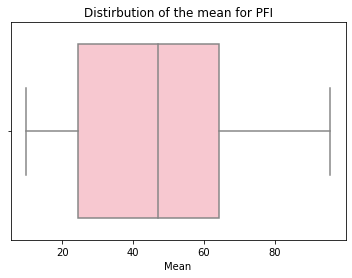

In [ ]:
sns.boxplot(x=pfi["Mean"], color="pink")
plt.title("Distirbution of the mean for PFI")
plt.show()

#### Combined Revised Polity Score

In [ ]:
psc.Mean.describe()

count    135.000000
mean       3.872222
std        6.020617
min      -10.000000
25%       -0.750000
50%        6.000000
75%        9.000000
max       10.000000
Name: Mean, dtype: float64

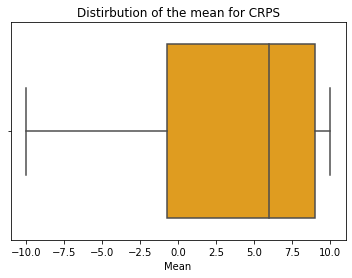

In [ ]:
sns.boxplot(x=psc["Mean"], color="orange")
plt.title("Distirbution of the mean for CRPS")
plt.show()

#### Corruption

In [ ]:
crp.Mean.describe()

count    121.000000
mean       0.427879
std        0.181139
min        0.061198
25%        0.309028
50%        0.390191
75%        0.457031
max        0.975694
Name: Mean, dtype: float64

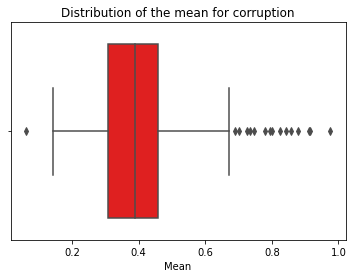

In [ ]:
sns.boxplot(x=crp["Mean"], color="red")
plt.title("Distribution of the mean for corruption")
plt.show()

#### Education index

In [ ]:
educind.Mean.describe()

count    162.000000
mean       0.607932
std        0.177168
min        0.171250
25%        0.462016
50%        0.637063
75%        0.743187
max        0.909062
Name: Mean, dtype: float64

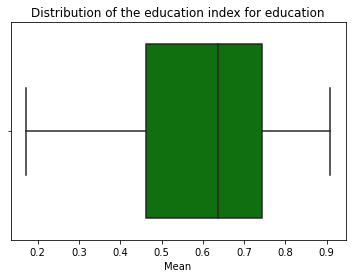

In [ ]:
sns.boxplot(x=educind["Mean"], color="green")
plt.title("Distribution of the education index for education")
plt.show()

#### Real GDP per capita (PPP)

In [ ]:
gdp.Mean.describe()

count       170.000000
mean      16332.701592
std       18848.228183
min         632.484194
25%        3127.399773
50%        9035.930359
75%       20828.244920
max      117284.430609
Name: Mean, dtype: float64

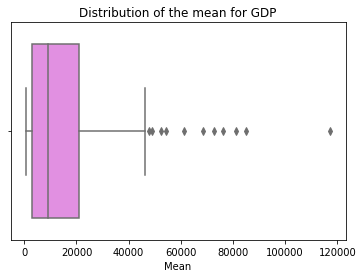

In [ ]:
sns.boxplot(x=gdp["Mean"], color="violet")
plt.title("Distribution of the mean for GDP")
plt.show()

#### Judicial independence

In [ ]:
judin.Mean.describe()

count    140.000000
mean       0.493588
std        0.196320
min        0.030648
25%        0.340218
50%        0.476837
75%        0.625176
max        1.000000
Name: Mean, dtype: float64

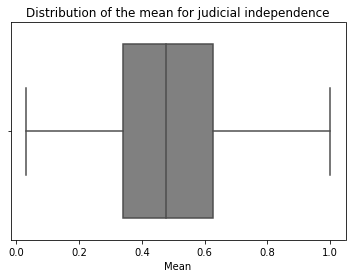

In [ ]:
sns.boxplot(x=judin["Mean"], color="gray")
plt.title("Distribution of the mean for judicial independence")
plt.show()

### Regressions (in progress)

#### Plotting PFI against different indicators

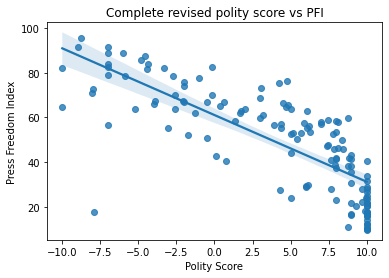

Correlation coef. : -0.784691440657193


In [ ]:
x, y = psc["Mean"], psc_pfi["Mean"]

sns.regplot(x=x, y=y)
plt.title("Complete revised polity score vs PFI")
plt.xlabel('Polity Score')
plt.ylabel('Press Freedom Index')
plt.show()

print("Correlation coef. :", np.corrcoef(x, y)[0,1])

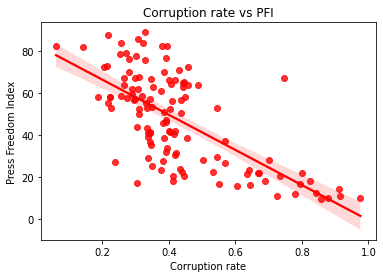

Correlation coef. : -0.6838192828502417


In [ ]:
x, y = crp["Mean"], crp_pfi["Mean"]

sns.regplot(x=x, y=y, color='red')
plt.title("Corruption rate vs PFI")
plt.ylabel('Press Freedom Index')
plt.xlabel('Corruption rate')
plt.show()

print("Correlation coef. :", np.corrcoef(x, y)[0,1])

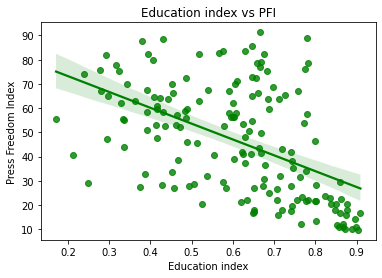

Correlation coef. : -0.5098632204837922


In [ ]:
x, y = educind["Mean"], educind_pfi["Mean"]

sns.regplot(x=x, y=y, color='green')
plt.title("Education index vs PFI")
plt.ylabel('Press Freedom Index')
plt.xlabel('Education index')
plt.show()

print("Correlation coef. :", np.corrcoef(x, y)[0,1])

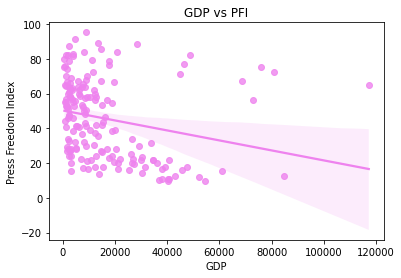

Correlation coef. : -0.23767389882043913


In [ ]:
x, y = gdp["Mean"], gdp_pfi["Mean"]

sns.regplot(x=x, y=y, color='violet')
plt.title("GDP vs PFI")
plt.ylabel('Press Freedom Index')
plt.xlabel('GDP')
plt.show()

print("Correlation coef. :", np.corrcoef(x, y)[0,1])

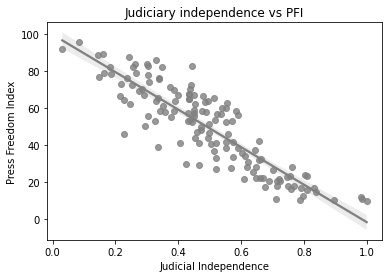

Correlation coef. : -0.8819239164579409


In [ ]:
x, y = judin["Mean"], judin_pfi["Mean"]

sns.regplot(x=x, y=y, color='gray')
plt.title("Judiciary independence vs PFI")
plt.ylabel('Press Freedom Index')
plt.xlabel('Judicial Independence')
plt.show()

print("Correlation coef. :", np.corrcoef(x, y)[0,1])

#### OLS on PFI

Creating a dataframe of countries having data of all observed indicators

In [ ]:
mean_indic = {'Country': [], 'mGDP':[], 'mEduc':[], 'mJudin':[],'mCorrup':[],'mCRPS':[], 'PFI': []}

for idx, row in psc_pfi.iterrows():
  if row["country"] in gdp["country"].tolist() and row["country"] in crp["country"].tolist() and row["country"] in educind["country"].tolist() and row["country"] in judin["country"].tolist():
    mean_indic['Country'].append(row["country"])
    mean_indic['mGDP'].append(gdp[gdp["country"] == row["country"]]['Mean'].item())
    mean_indic['mEduc'].append(educind[educind["country"] == row["country"]]['Mean'].item())
    mean_indic['mJudin'].append(judin[judin["country"] == row["country"]]['Mean'].item())
    mean_indic['mCorrup'].append(crp[crp["country"] == row["country"]]['Mean'].item())
    mean_indic['mCRPS'].append(psc[psc["country"] == row["country"]]['Mean'].item())
    mean_indic['PFI'].append(psc_pfi[psc_pfi["country"] == row["country"]]['Mean'].item())

mean_df = pd.DataFrame(mean_indic)
mean_df

,Country,mGDP,mEduc,mJudin,mCorrup,mCRPS,PFI
0,Albania,8254.753419,0.669063,0.472573,0.311632,8.3750,49.8750
1,Angola,5973.824465,0.392125,0.433672,0.298177,-2.0625,67.3750
2,Argentina,16287.665380,0.798125,0.496617,0.391059,8.1250,46.3750
3,Armenia,7219.599536,0.710813,0.328497,0.265625,5.0000,63.8125
4,Azerbaijan,11358.541644,0.667187,0.164431,0.272569,-7.0000,79.0625
...,...,...,...,...,...,...,...
97,United Kingdom,36029.041852,0.876188,0.712910,0.735243,10.0000,20.3125
98,United States,47701.945036,0.877750,0.767386,0.688802,9.8750,18.0000
99,Uruguay,15143.475320,0.708062,0.701408,0.570312,10.0000,26.5625
100,Zambia,2756.386620,0.517813,0.553722,0.443576,6.0625,62.8125


Fitting model using all observed independent variables

In [ ]:
mean_df['logCorrup'] = np.log(mean_df['mCorrup'])

lm = smf.ols(formula='PFI~mGDP+mCRPS+mCorrup+mEduc+mJudin', data=mean_df)
unrestricted = lm.fit()
print(unrestricted.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           4.02e-38
Time:                        20:10:22   Log-Likelihood:                -361.95
No. Observations:                 102   AIC:                             735.9
Df Residuals:                      96   BIC:                             751.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.7874      4.109     21.120      0.0

Fitting a model with independent variables that more logically influence PFI

In [ ]:
lm = smf.ols(formula='PFI~mCRPS+logCorrup+mJudin', data=mean_df)
restricted = lm.fit()
print(restricted.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           4.82e-40
Time:                        17:13:22   Log-Likelihood:                -362.80
No. Observations:                 102   AIC:                             733.6
Df Residuals:                      98   BIC:                             744.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.2534      5.507     13.302      0.0

Individual single-variable regressions

1. PFI~logCorrup

In [ ]:
lm = smf.ols(formula='PFI~logCorrup', data=mean_df)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     76.97
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           4.81e-14
Time:                        14:34:36   Log-Likelihood:                -429.99
No. Observations:                 102   AIC:                             864.0
Df Residuals:                     100   BIC:                             869.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2273      3.898      3.906      0.0

In [ ]:
lm = smf.ols(formula='PFI~mJudin', data=mean_df)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     323.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           4.24e-33
Time:                        14:34:40   Log-Likelihood:                -385.51
No. Observations:                 102   AIC:                             775.0
Df Residuals:                     100   BIC:                             780.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.5588      3.148     31.623      0.0

In [ ]:
lm = smf.ols(formula='PFI~mCRPS', data=mean_df)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.50e-24
Time:                        14:34:43   Log-Likelihood:                -406.03
No. Observations:                 102   AIC:                             816.1
Df Residuals:                     100   BIC:                             821.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.9940      1.693     36.032      0.0

In [ ]:
lm = smf.ols(formula='PFI~mEduc', data=mean_df)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     38.81
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.11e-08
Time:                        14:34:45   Log-Likelihood:                -442.37
No. Observations:                 102   AIC:                             888.7
Df Residuals:                     100   BIC:                             894.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.9186      6.476     13.113      0.0

In [ ]:
lm = smf.ols(formula='PFI~mGDP', data=mean_df)
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    PFI   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.022
Date:                Wed, 01 Jun 2022   Prob (F-statistic):            0.00936
Time:                        14:34:54   Log-Likelihood:                -455.64
No. Observations:                 102   AIC:                             915.3
Df Residuals:                     100   BIC:                             920.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4860      2.887     17.833      0.0

#### Time series analysis
We take several countries from the data and construct a time series plot for each of the indicators, for which there is data in the countries.

In [ ]:
psc_ts = psc[psc['country'].isin(['Ukraine', 'United States', 'Bangladesh'])].copy()
psc_ts = psc_ts.transpose()
psc_ts.columns = psc_ts.iloc[0]
psc_ts = psc_ts.iloc[1:-1 , :]
psc_ts.index.names = ['Year']

crp_ts = crp[crp['country'].isin(['Ukraine', 'United States', 'Bangladesh'])].copy()
crp_ts = crp_ts.transpose()
crp_ts.columns = crp_ts.iloc[0]
crp_ts = crp_ts.iloc[1:-1 , :]
crp_ts.index.names = ['Year']

judin_ts = judin[judin['country'].isin(['Ukraine', 'United States', 'Bangladesh'])].copy()
judin_ts = judin_ts.transpose()
judin_ts.columns = judin_ts.iloc[0]
judin_ts = judin_ts.iloc[1:-1 , :]
judin_ts.index.names = ['Year']

educind_ts = educind[educind['country'].isin(['Ukraine', 'United States', 'Bangladesh'])].copy()
educind_ts = educind_ts.transpose()
educind_ts.columns = educind_ts.iloc[0]
educind_ts = educind_ts.iloc[1:-1 , :]
educind_ts.index.names = ['Year']

gdp_ts = gdp[gdp['country'].isin(['Ukraine', 'United States', 'Bangladesh'])].copy()
gdp_ts = gdp_ts.transpose()
gdp_ts.columns = gdp_ts.iloc[0]
gdp_ts = gdp_ts.iloc[1:-1 , :]
gdp_ts.index.names = ['Year']

pfi_ts = gdp_pfi[gdp_pfi['country'].isin(['Ukraine', 'United States', 'Bangladesh'])].copy()
pfi_ts = pfi_ts.transpose()
pfi_ts.columns = pfi_ts.iloc[0]
pfi_ts = pfi_ts.iloc[1:-1 , :]
pfi_ts.index.names = ['Year']

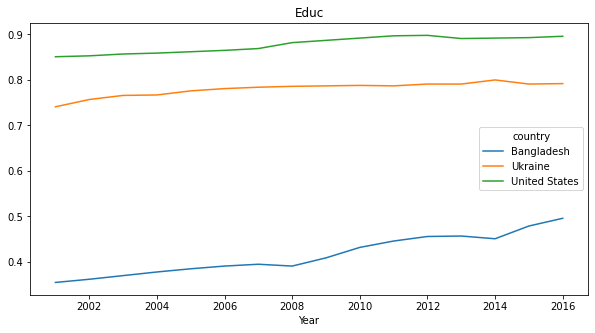

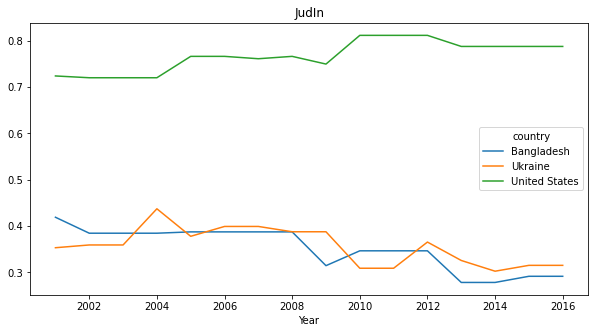

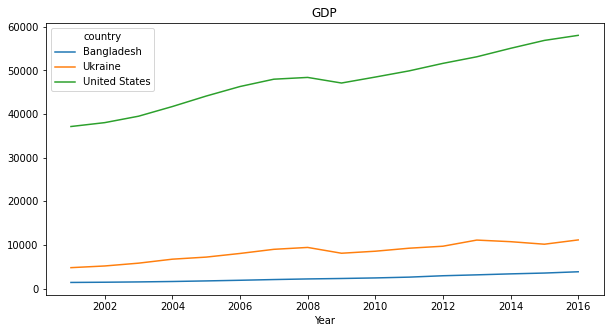

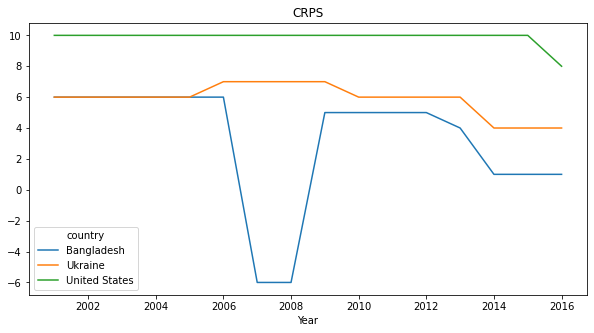

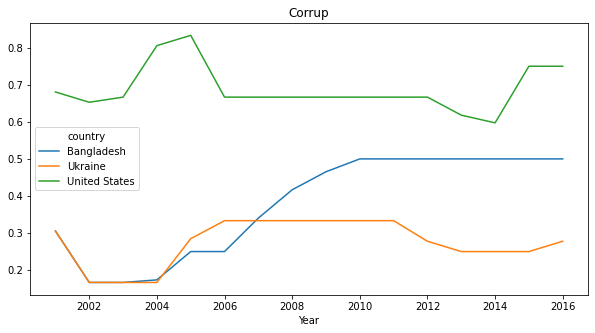

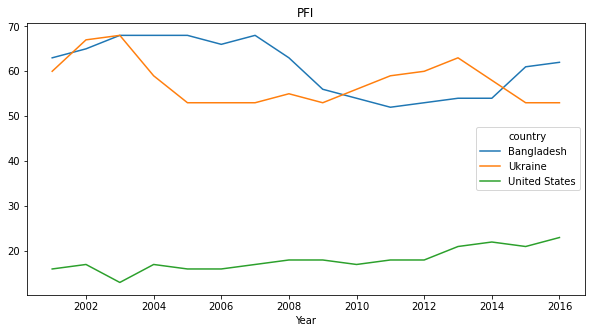

In [ ]:
educind_ts.plot(figsize=(10,5), title='Education')
judin_ts.plot(figsize=(10,5), title='Judiciary independence')
gdp_ts.plot(figsize=(10,5), title='GDP')
psc_ts.plot(figsize=(10,5), title='CRPS')
crp_ts.plot(figsize=(10,5), title='Corruption')
pfi_ts.plot(figsize=(10,5), title='PFI')

This 